In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Data Preprocessing**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/flight#data.csv')
df.head(10)



,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,2018,1,1,1,5,DL,N836DN,1399,10397,ATL,...,1907.0,2.0,0.0,2143,2102.0,-41.0,0.0,0,0,2182
1,2018,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1344.0,-1.0,0.0,1435,1439.0,4.0,0.0,0,0,528
2,2018,1,1,1,5,DL,N813DN,1597,10397,ATL,...,942.0,2.0,0.0,1215,1142.0,-33.0,0.0,0,0,2182
3,2018,1,1,1,5,DL,N587NW,1768,14747,SEA,...,820.0,1.0,0.0,1335,1345.0,10.0,0.0,0,0,1399
4,2018,1,1,1,5,DL,N836DN,1823,14747,SEA,...,2256.0,-4.0,0.0,607,615.0,8.0,0.0,0,0,1927
5,2018,1,1,1,5,DL,N936DL,1975,13487,MSP,...,1127.0,-2.0,0.0,1459,1441.0,-18.0,0.0,0,0,907
6,2018,1,1,2,6,DL,N983DL,2074,10397,ATL,...,1745.0,0.0,0.0,1931,1920.0,-11.0,0.0,0,0,907
7,2018,1,1,2,6,DL,N589NW,2151,13487,MSP,...,1751.0,11.0,0.0,1929,1908.0,-21.0,0.0,0,0,1399
8,2018,1,1,2,6,DL,N804DN,2221,13487,MSP,...,1115.0,0.0,0.0,1305,1255.0,-10.0,0.0,0,0,1399
9,2018,1,1,2,6,DL,N965DN,2291,13487,MSP,...,1443.0,13.0,0.0,1801,1800.0,-1.0,0.0,0,0,907



 **EDA-Exploratory Data Analysis.**

In [ ]:

# Confirm that the DataFrame contains 11,231 rows and 26 columns:
df.shape

(10776, 23)

In [ ]:
#identifying and removing outliers from a dataset using the interquartile range (IQR) method.
#for Data Cleaning
#Improved Statistical Analysis
#Preserving Data Integrity
#Robust Model Training
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
outliers = ((df < (Q1 - 1.5 * IQR)).align(df > (Q3 + 1.5 * IQR), axis=1)[0]).any(axis=1)


<ipython-input-235-20e6ee5b3396>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)).align(df > (Q3 + 1.5 * IQR), axis=1)[0]).any(axis=1)


In [ ]:
 # Get information about the dataset
 print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               10776 non-null  int64  
 1   QUARTER            10776 non-null  int64  
 2   MONTH              10776 non-null  int64  
 3   DAY_OF_MONTH       10776 non-null  int64  
 4   DAY_OF_WEEK        10776 non-null  int64  
 5   UNIQUE_CARRIER     10776 non-null  object 
 6   TAIL_NUM           10776 non-null  object 
 7   FL_NUM             10776 non-null  int64  
 8   ORIGIN_AIRPORT_ID  10776 non-null  int64  
 9   ORIGIN             10776 non-null  object 
 10  DEST_AIRPORT_ID    10776 non-null  int64  
 11  DEST               10776 non-null  object 
 12  CRS_DEP_TIME       10776 non-null  int64  
 13  DEP_TIME           10671 non-null  float64
 14  DEP_DELAY          10671 non-null  float64
 15  DEP_DEL15          10671 non-null  float64
 16  CRS_ARR_TIME       107

In [ ]:
# Summary statistics
print(df.describe())

          YEAR       QUARTER         MONTH  DAY_OF_MONTH   DAY_OF_WEEK  \
count  10776.0  10776.000000  10776.000000  10776.000000  10776.000000   
mean    2018.0      2.483018      6.402190     15.479677      3.958333   
std        0.0      1.070806      3.234112      8.754043      1.997918   
min     2018.0      1.000000      1.000000      1.000000      1.000000   
25%     2018.0      2.000000      4.000000      8.000000      2.000000   
50%     2018.0      3.000000      7.000000     15.000000      4.000000   
75%     2018.0      3.000000      9.000000     23.000000      6.000000   
max     2018.0      4.000000     12.000000     31.000000      7.000000   

             FL_NUM  ORIGIN_AIRPORT_ID  DEST_AIRPORT_ID  CRS_DEP_TIME  \
count  10776.000000       10776.000000     10776.000000  10776.000000   
mean    1333.203137       12336.649035     12300.659243   1320.026540   
std      811.690929        1595.869052      1601.910746    491.051201   
min        7.000000       10397.000000   

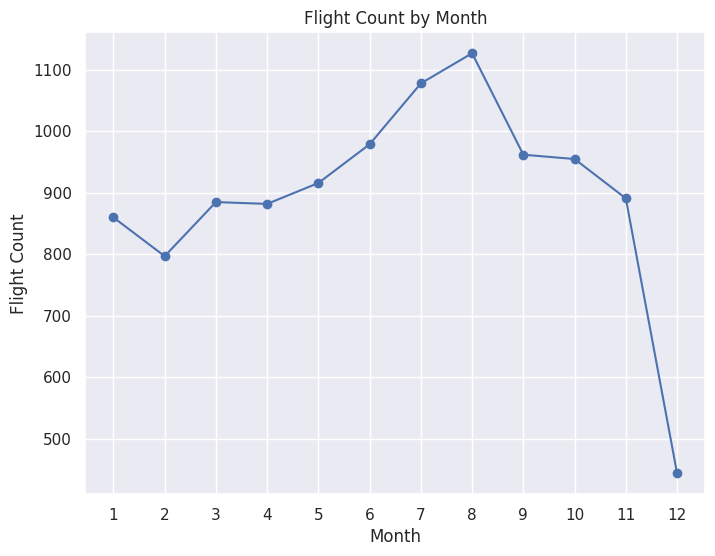

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of flights for each month
flight_count_by_month = df['MONTH'].value_counts().sort_index()

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.plot(flight_count_by_month.index, flight_count_by_month.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Flight Count')
plt.title('Flight Count by Month')
plt.xticks(flight_count_by_month.index)
plt.show()

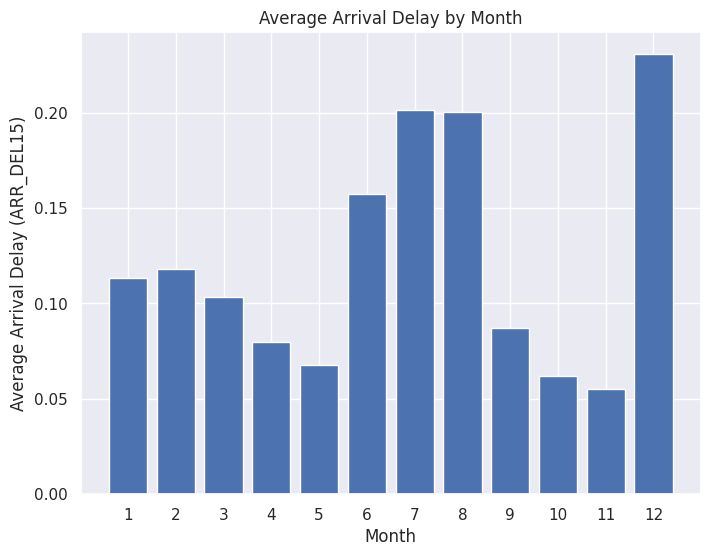

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average ARR_DEL15 for each month
avg_delay_by_month = df.groupby('MONTH')['ARR_DEL15'].mean() #This line calculates the average 'ARR_DEL15' values for each unique month in the DataFrame df.

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(avg_delay_by_month.index, avg_delay_by_month.values)
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay (ARR_DEL15)')
plt.title('Average Arrival Delay by Month')
plt.xticks(avg_delay_by_month.index)
plt.show()

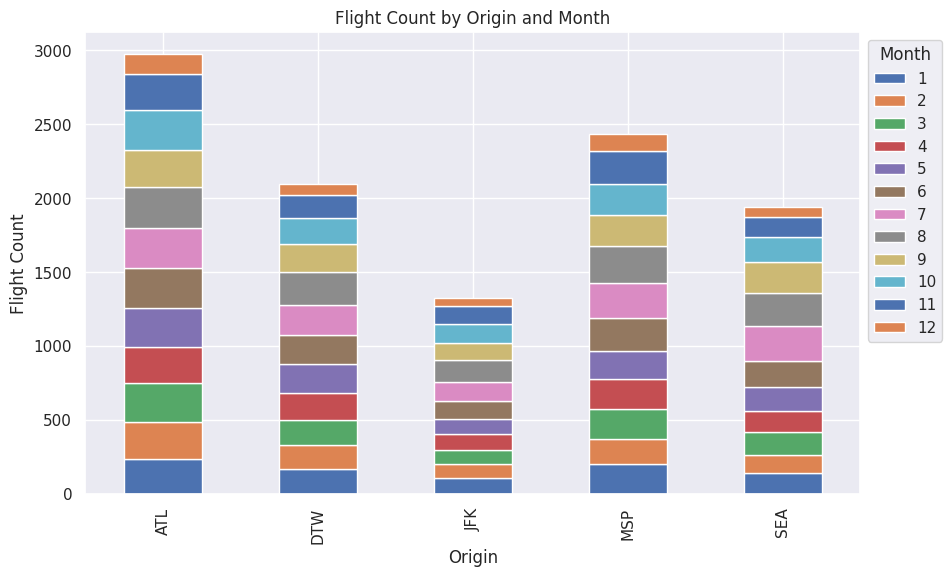

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Calculate the count of flights for each combination of origin and month
flight_count_by_origin_month = df.groupby(['ORIGIN', 'MONTH']).size().unstack()

# Plotting the graph
flight_count_by_origin_month.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Origin')
plt.ylabel('Flight Count')
plt.title('Flight Count by Origin and Month')
plt.legend(title='Month', bbox_to_anchor=(1, 1))
plt.show()

<ipython-input-241-3a52b575f5f1>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', len(flight_count_by_month_origin_dest['MONTH'].unique()))  # Use Set3 colormap for brighter colors


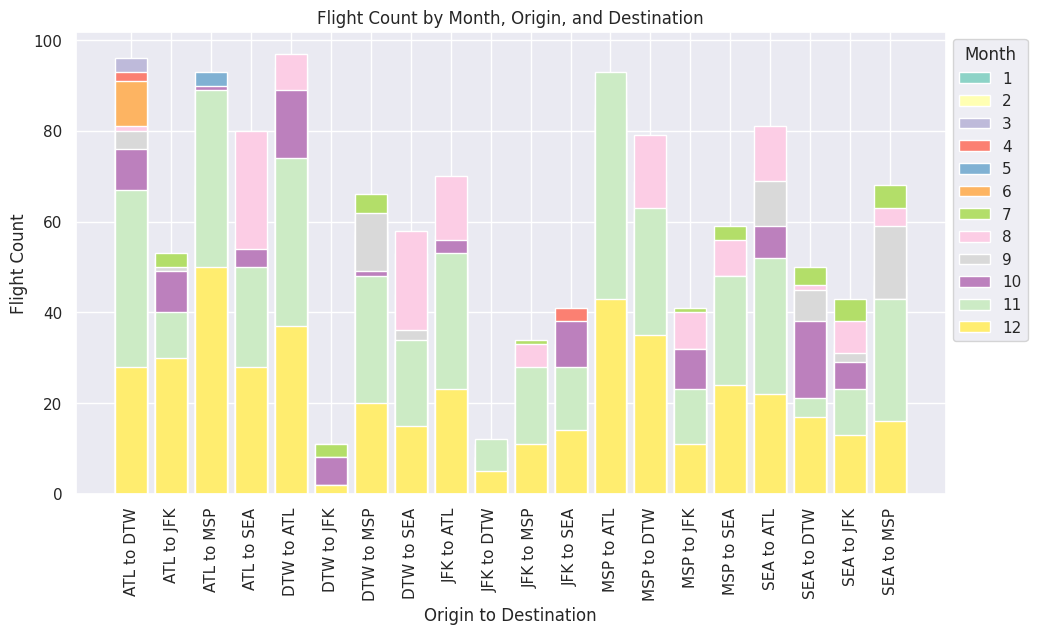

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of flights for each combination of month, origin, and destination
flight_count_by_month_origin_dest = df.groupby(['MONTH', 'ORIGIN', 'DEST']).size()

# Reset the index to make it easier to work with
flight_count_by_month_origin_dest = flight_count_by_month_origin_dest.reset_index(name='Flight Count')

# Plotting the graph
plt.figure(figsize=(12, 6))
colors = plt.cm.get_cmap('Set3', len(flight_count_by_month_origin_dest['MONTH'].unique()))  # Use Set3 colormap for brighter colors
for i, month in enumerate(flight_count_by_month_origin_dest['MONTH'].unique()):
    data = flight_count_by_month_origin_dest[flight_count_by_month_origin_dest['MONTH'] == month]
    plt.bar(data['ORIGIN'] + ' to ' + data['DEST'], data['Flight Count'], color=colors(i))
plt.xlabel('Origin to Destination')
plt.ylabel('Flight Count')
plt.title('Flight Count by Month, Origin, and Destination')
plt.xticks(rotation=90)

# Adjust the legend position to the right side
plt.legend(flight_count_by_month_origin_dest['MONTH'].unique(), title='Month', bbox_to_anchor=(1, 1))
plt.subplots_adjust(right=0.85)  # Adjust the right margin to accommodate the legend

plt.show()

In [ ]:

# Number of missing values in each column
df = pd.read_csv('/content/gdrive/MyDrive/flight#data.csv')
df.isnull().sum()


YEAR                   0
QUARTER                0
MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
UNIQUE_CARRIER         0
TAIL_NUM               0
FL_NUM                 0
ORIGIN_AIRPORT_ID      0
ORIGIN                 0
DEST_AIRPORT_ID        0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME             105
DEP_DELAY            105
DEP_DEL15            105
CRS_ARR_TIME           0
ARR_TIME             113
ARR_DELAY            186
ARR_DEL15            186
CANCELLED              0
DIVERTED               0
DISTANCE               0
dtype: int64

**Identifying and removing outliers from a dataset using the interquartile range (IQR) method.**


In [ ]:
#for Data Cleaning
#Improved Statistical Analysis
#Preserving Data Integrity
#Robust Model Training

Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
outliers = ((df < (Q1 - 1.5 * IQR)).align(df > (Q3 + 1.5 * IQR), axis=1)[0]).any(axis=1)

<ipython-input-257-1b89d74ba27e>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)).align(df > (Q3 + 1.5 * IQR), axis=1)[0]).any(axis=1)


**DATA NORMALIZATION**

In [ ]:

total_columns = len(df.columns)
normalized_columns = df.apply(lambda x: x.isnull().sum() == 0).sum()
percentage_normalized = (normalized_columns / total_columns) * 100
print("Percentage of data normalized: {:.2f}%".format(percentage_normalized))


Percentage of data normalized: 73.91%


**DATA STANDARDIZATION**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the numeric columns for standardization
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a new DataFrame with only the numeric columns
df_numeric = df[numeric_columns]

# Standardize the numeric columns
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_numeric)

# Replace the original numeric columns with the standardized values
df[numeric_columns] = df_standardized

# Calculate the percentage of data standardized
total_columns = len(df.columns)
standardized_columns = df.apply(lambda x: x.isnull().sum() == 0).sum()
percentage_standardized = (standardized_columns / total_columns) * 100

print("Percentage of data standardized: {:.2f}%".format(percentage_standardized))


Percentage of data standardized: 73.91%


**Gaussion normal form**

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Select the numeric columns for transformation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a new DataFrame with only the numeric columns
df_numeric = df[numeric_columns]

# Apply the power transform to the numeric columns
transformer = PowerTransformer(method='yeo-johnson')  # You can choose 'box-cox' or 'yeo-johnson' method
df_transformed = transformer.fit_transform(df_numeric)

# Replace the original numeric columns with the transformed values
df[numeric_columns] = df_transformed

# Calculate the percentage of data transformed
total_columns = len(df.columns)
transformed_columns = df.apply(lambda x: x.isnull().sum() == 0).sum()
percentage_transformed = (transformed_columns / total_columns) * 100

print("Percentage of data transformed: {:.2f}%".format(percentage_transformed))


Percentage of data transformed: 73.91%


**Feature extraction methodologies**
1. Date and Time Features

2. Origin and Destination Features

3. Time-related Features

4. Historical Delay Features


5. Airline-related Features

6. Flight-specific Features

7. Interaction Features:
   - Create interaction features by combining relevant features, such as the interaction between the departure airport and the day of the week.
These methodologies provide a starting point for feature extraction in a flight delay prediction model. However, the specific feature engineering techniques may vary depending on the dataset, domain knowledge, and the chosen machine learning algorithm. It is important to explore and experiment with different features to find the most informative ones for accurate predictions.

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/flight#data.csv')

In [ ]:
# The output shows that the DataFrame now includes only the columns that are relevant to the model,
# and that the number of missing values is greatly reduced:
df = df[["MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_DEP_TIME", "ARR_DEL15"]]
df.isnull().sum()
# The filtered DataFrame

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_DEP_TIME      0
ARR_DEL15       186
dtype: int64

In [ ]:
# The only column that now contains missing values is the ARR_DEL15 column,
# which uses 0s to identify flights that arrived on time and 1s for flights that didn't.

# Pandas represents missing values with NaN, which stands for Not a Number.
# The output shows that these rows are indeed missing values in the ARR_DEL15 column

df[df.isnull().values.any(axis=1)]
df.head(10)


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,1905,0.0
1,1,1,5,DTW,MSP,1345,0.0
2,1,1,5,ATL,SEA,940,0.0
3,1,1,5,SEA,MSP,819,0.0
4,1,1,5,SEA,DTW,2300,0.0
5,1,1,5,MSP,ATL,1129,0.0
6,1,2,6,ATL,MSP,1745,0.0
7,1,2,6,MSP,SEA,1740,0.0
8,1,2,6,MSP,SEA,1115,0.0
9,1,2,6,MSP,ATL,1430,0.0


In [ ]:
# let's use the fillna method to replace the missing values with 1s.
df = df.fillna({'ARR_DEL15': 1})
df.iloc[177:185]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,1.0
178,1,9,6,DTW,JFK,1527,0.0
179,1,10,7,MSP,DTW,1348,1.0
180,1,10,7,DTW,MSP,1540,0.0
181,1,10,7,JFK,ATL,1325,0.0
182,1,10,7,JFK,ATL,610,0.0
183,1,10,7,JFK,SEA,1615,0.0
184,1,10,7,MSP,DTW,625,1.0


In [ ]:

# Observe that the CRS_DEP_TIME column contains values from 0 to 2359 representing military times.
df.head()


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,1905,0.0
1,1,1,5,DTW,MSP,1345,0.0
2,1,1,5,ATL,SEA,940,0.0
3,1,1,5,SEA,MSP,819,0.0
4,1,1,5,SEA,DTW,2300,0.0


In [ ]:
# Use the following statements to bin the departure times:
# Confirm that the numbers in the CRS_DEP_TIME column now fall in the range 0 to 23:
import math

for index, row in df.iterrows():
    df.loc[index, 'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME'] / 100)
df.head()


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,19,0.0
1,1,1,5,DTW,MSP,13,0.0
2,1,1,5,ATL,SEA,9,0.0
3,1,1,5,SEA,MSP,8,0.0
4,1,1,5,SEA,DTW,23,0.0


In [ ]:

# Now use the following statements to generate indicator columns from the ORIGIN and DEST columns,
# while dropping the ORIGIN and DEST columns themselves:

df=pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,19,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,13,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,9,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,8,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,23,0.0,0,0,0,0,1,0,1,0,0,0


In [ ]:
#Build Machine Learning Model

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop('ARR_DEL15', axis=1), df['ARR_DEL15'], test_size=0.2, random_state=42)

In [ ]:
# display the number of rows and columns in the DataFrame containing the feature columns used for training:
train_x.shape


(8620, 14)

In [ ]:

# display the number of rows and columns in the DataFrame containing the feature columns used for testing:
test_x.shape

(2156, 14)

In [ ]:
# display the number of rows and columns in the DataFrame containing the feature columns used for testing:
test_y.shape

(2156,)

In [ ]:
# display the number of rows and columns in the DataFrame containing the feature columns used for testing:
train_y.shape

(8620,)

In [ ]:

# Your model will be a binary classification model that predicts whether a flight will arrive on-time or late
# ("binary" because there are only two possible outputs).
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable train_y as categorical
train_y_encoded = label_encoder.fit_transform(train_y)

# Create and fit the RandomForestClassifier model with the encoded target variable
model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y_encoded)



RandomForestClassifier(random_state=13)

In [ ]:

# Now call the predict method to test the model using the values in test_x,
# followed by the score method to determine the mean accuracy of the model:
# Convert continuous target variable to binary
threshold = 0.5  # Set a threshold value to classify as 0 or 1
binary_test_y = (test_y >= threshold).astype(int)

# Make predictions and calculate accuracy
predicted = model.predict(test_x)
accuracy = model.score(test_x, binary_test_y)

print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 86.04%


In [ ]:

# generate a set of prediction probabilities from the test data:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)


In [ ]:
# generate an ROC AUC score from the probabilities using scikit-learn's roc_auc_score method:
# Convert continuous target variable to binary
threshold = 0.5  # Set a threshold value to classify as 0 or 1
binary_test_y = (test_y >= threshold).astype(int)

# Calculate ROC AUC score
roc_auc = roc_auc_score(binary_test_y, probabilities[:, 1])

print("ROC AUC Score: {:.2f}".format(roc_auc))


ROC AUC Score: 0.69


In [ ]:

# Convert continuous target variable to binary
threshold = 0.5  # Set a threshold value to classify as 0 or 1
binary_test_y = (test_y >= threshold).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(binary_test_y, predicted)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[1819   28]
 [ 273   36]]


In [ ]:

# quantify the precision of your model
# Convert continuous true labels to binary
threshold = 0.5  # Set a threshold value to classify as 0 or 1
binary_train_y = (train_y >= threshold).astype(int)

# Calculate precision score
precision = precision_score(binary_train_y, train_predictions)

print("Precision Score:", precision)


Precision Score: 1.0


In [ ]:
# Convert continuous true labels to binary
threshold = 0.5  # Set a threshold value to classify as 0 or 1
binary_train_y = (train_y >= threshold).astype(int)

# Calculate recall score
recall = recall_score(binary_train_y, train_predictions)

print("Recall Score:", recall)


Recall Score: 0.9982668977469671


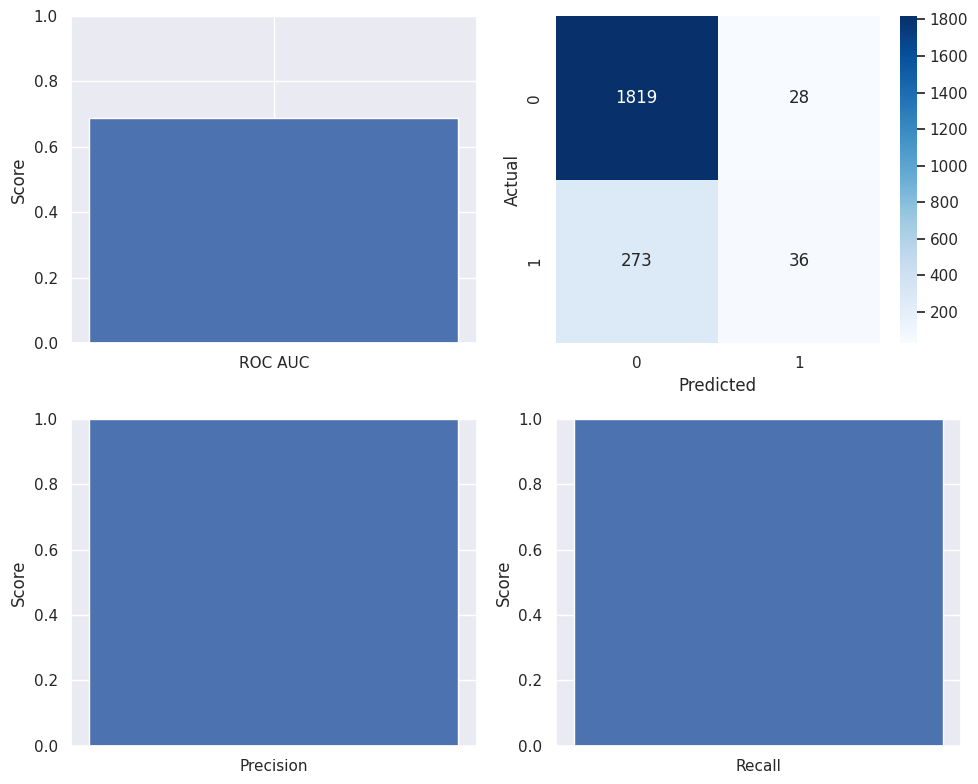

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns



# Plotting the metrics
plt.figure(figsize=(10, 8))

# ROC AUC score
plt.subplot(2, 2, 1)
plt.bar(['ROC AUC'], [roc_auc])
plt.ylim(0, 1)
plt.ylabel('Score')

# Confusion matrix
plt.subplot(2, 2, 2)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Precision score
plt.subplot(2, 2, 3)
plt.bar(['Precision'], [precision])
plt.ylim(0, 1)
plt.ylabel('Score')

# Recall score
plt.subplot(2, 2, 4)
plt.bar(['Recall'], [recall])
plt.ylim(0, 1)
plt.ylabel('Score')

plt.tight_layout()
plt.show()


In [ ]:
#Visualize Output of Model

In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


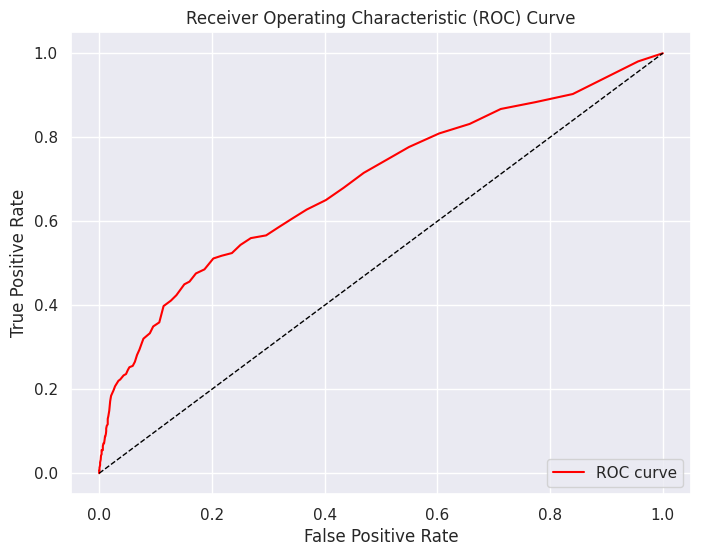

In [ ]:
from sklearn.metrics import roc_curve

# Convert continuous true labels to binary
threshold = 0.5  # Set a threshold value to classify as 0 or 1
binary_test_y = (test_y >= threshold).astype(int)

# Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(binary_test_y, probabilities[:, 1])

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='red', label='ROC curve')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [ ]:
from datetime import datetime

def predict_delay(departure_date_time, origin, destination):
    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    month = departure_date_time_parsed.month
    day_of_month = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour

    origin = origin.upper()
    destination = destination.upper()

    input_data = pd.DataFrame({
        'MONTH': [month],
        'DAY_OF_MONTH': [day_of_month],
        'DAY_OF_WEEK': [day_of_week],
        'CRS_DEP_TIME': [hour],
        'ORIGIN_ATL': [1 if origin == 'ATL' else 0],
        'ORIGIN_DTW': [1 if origin == 'DTW' else 0],
        'ORIGIN_JFK': [1 if origin == 'JFK' else 0],
        'ORIGIN_MSP': [1 if origin == 'MSP' else 0],
        'ORIGIN_SEA': [1 if origin == 'SEA' else 0],
        'DEST_ATL': [1 if destination == 'ATL' else 0],
        'DEST_DTW': [1 if destination == 'DTW' else 0],
        'DEST_JFK': [1 if destination == 'JFK' else 0],
        'DEST_MSP': [1 if destination == 'MSP' else 0],
        'DEST_SEA': [1 if destination == 'SEA' else 0]
    })

    return model.predict_proba(input_data)[0][0]

predict_delay('01/10/2016 09:45:00', 'JFK', 'ATL')


0.58

In [ ]:
predict_delay('01/10/2016 09:45:00', 'JFK', 'ATL')


0.58

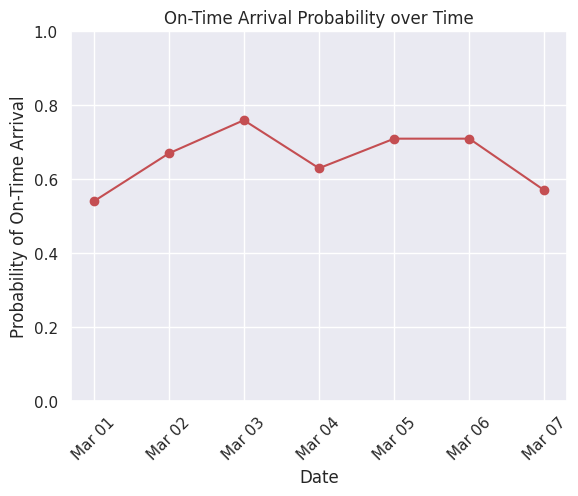

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = [
    {'date': '1/3/2018 21:45:00', 'origin': 'JFK', 'destination': 'ATL'},
    {'date': '2/3/2018 21:45:00', 'origin': 'JFK', 'destination': 'ATL'},
    {'date': '3/3/2018 21:45:00', 'origin': 'JFK', 'destination': 'ATL'},
    {'date': '4/3/2018 21:45:00', 'origin': 'JFK', 'destination': 'ATL'},
    {'date': '5/3/2018 21:45:00', 'origin': 'JFK', 'destination': 'ATL'},
    {'date': '6/3/2018 21:45:00', 'origin': 'JFK', 'destination': 'ATL'},
    {'date': '7/3/2018 21:45:00', 'origin': 'JFK', 'destination': 'ATL'}
]

labels = [datetime.strptime(d['date'], '%d/%m/%Y %H:%M:%S').strftime('%b %d') for d in data]
values = [predict_delay(d['date'], d['origin'], d['destination']) for d in data]

plt.plot(labels, values, marker='o', linestyle='-', color='r')
plt.xlabel('Date')
plt.ylabel('Probability of On-Time Arrival')
plt.title('On-Time Arrival Probability over Time')
plt.xticks(rotation=45)
plt.ylim((0.0, 1.0))
plt.grid(True)
plt.show()


